# Titanic - Machine Learning from Disaster

* Author: Lamin Bojang
* Date created: 2023-06-10
* Date modified: 2023-06-20
* Description: Titanic data analysis and visualization


TODO:
- [x] Import libraries
- [x] Load data
- [x] Data cleaning
- [x] Data exploration
- [x] Data visualization
- [x]check for missing values
- [x] Data imputation
- [x] Drop unnecessary columns
- [x] Convert categorical to numerical
- [x] Check for Imbalances in the  Survival/Target feature


**Data Dictionary**

| Variable | Definition                             | Key                                       |
|----------|----------------------------------------|-------------------------------------------|
| survival | Survival                               | 0 = No, 1 = Yes                           |
| pclass   | Ticket class                           | 1 = 1st, 2 = 2nd, 3 = 3rd                 |
| sex      | Sex                                    |                                           |
| Age      | Age in years                           |                                           |
| sibsp    | # of siblings / spouses aboard Titanic |                                           |
| parch    | # of parents / children aboard Titanic |                                           |
| ticket   | Ticket number                          |                                           |
| fare     | Passenger fare                         |                                           |
| cabin    | Cabin number                           |                                           |
| embarked | Port of Embarkation                    | C = Cherbourg, Q = Queenstown, S = Southampton |


In [ ]:
# !pip install missingno

import numpy as np
import pandas as pd
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
# Set the background color globally
plt.rcParams['axes.facecolor'] = 'darkgray'

import seaborn as sns
sns.set_style('darkgrid')

palette = sns.color_palette("coolwarm", 7)

#markdown display in jupyter notebook output
from IPython.core.display import Markdown as md

#Enable jupyter notebook cells to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#hide warnings
import warnings
warnings.filterwarnings('ignore')

### Helper Functions

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def generate_dataframe_summary(dataframe):
    """
    Generates a summary of the dataframe.
    """
    summary = pd.DataFrame({
        'features': dataframe.columns,
        'dataType': dataframe.dtypes,
        'unqValCount': dataframe.nunique(),
        'nullsCount': dataframe.isna().sum()
    })

    summary['nullsPct'] = (summary['nullsCount'] / dataframe.shape[0]).round(4) * 100
    summary['Unique values(All if < 10)'] = summary['features'].apply(lambda col: dataframe[col].unique()[:10])

    return summary.sort_values(by=["dataType", 'unqValCount'], ascending=False).reset_index(drop=True)


def encode_features(dataframe, features, method='onehot'):
    """
    Encodes specified features using either one-hot or label encoding.

    Parameters:
    features: A list of feature names to encode.
    method: The encoding method to use. Either 'onehot' or 'label'. Default is 'onehot'.
    """
    encoded_df = dataframe.copy()

    if method == 'onehot':
        encoder = OneHotEncoder()
        for feature in features:
            encoded_feature = pd.DataFrame(encoder.fit_transform(encoded_df[[feature]]).toarray())
            encoded_feature.columns = encoder.get_feature_names_out([feature])
            encoded_df = pd.concat([encoded_df, encoded_feature], axis=1).drop([feature], axis=1)
    elif method == 'label':
        encoder = LabelEncoder()
        for feature in features:
            encoded_df[feature] = encoder.fit_transform(encoded_df[feature])
    else:
        raise ValueError("Method must be either 'onehot' or 'label'.")

    return encoded_df

def correlation_matrix(df):
    corr = df.corr()
    figure = plt.figure(figsize=(8, 5))
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap', fontsize=8)
    plt.show()
    


### Import CSV to a pandas DataFrame


In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


# DATA Exploration

In [ ]:
md("### First Three Rows of the Training dataframe")
df_train.head(3)
md("### Random Sampling from the Training Data Frame")
df_train.sample(3)


In [ ]:
md("### First Three Rows of the Test dataframe")
df_test.head(3)
md("### Random Sampling from the Test Data Frame")
df_test.sample(3)


In [ ]:
df_train.describe()

In [ ]:
df_test.describe()

In [ ]:
generate_dataframe_summary(df_train)


In [ ]:
generate_dataframe_summary(df_test)


###  Data Plots

In [ ]:
# hist plot of numeric columns in the Training Data Frame
df_train.hist(figsize=(20, 10));

In [ ]:
# hist plot of numeric columns in the Training Data Frame
df_test.hist(figsize=(20, 10));

In [ ]:
#plot of categorical columns
fig, axes = plt.subplots(3,2 , figsize=(15, 10))
fig.set_facecolor('darkgray')

sns.countplot(data=df_train, x= 'Sex',  hue='Survived', ax=axes[0][0])
sns.countplot(data=df_train, x= 'Embarked',  hue='Survived', ax=axes[0][1])
sns.countplot(data=df_train, x= 'Pclass',  hue='Survived', ax=axes[1][0])
sns.countplot(data=df_train, x= 'SibSp',  hue='Survived', ax=axes[1][1])
sns.countplot(data=df_train, x= 'Parch',  hue='Survived', ax=axes[2][0])
# Add a placeholder plot in the last subplot
axes[2][1].axis('off')

plt.tight_layout();
    


In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Survival Rate by Sex, Embarked, Pclass, SibSp, Parch', fontsize=20)
sns.countplot(data=df_train, x='Sex', hue='Survived', ax=axes[0][0])
sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=axes[0][1])
sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=axes[1][0])
sns.countplot(data=df_train, x='SibSp', hue='Survived', ax=axes[1][1])
sns.countplot(data=df_train, x='Parch', hue='Survived', ax=axes[2][0])

# Add a placeholder plot in the last subplot
axes[2][1].axis('off')

plt.tight_layout()
plt.show();

# Data  Cleaning

#### Check for missing values

In [ ]:
md("### Train Data Summary")
generate_dataframe_summary(df_train)

md("### Test Data Summary")
generate_dataframe_summary(df_test)


In [ ]:
msno.matrix(df_train)
plt.title('Training Data Missing Values', fontsize=25)
plt.show();


In [ ]:
msno.matrix(df_test)
plt.title('Test Data Missing Values', fontsize=25)
plt.show();

> From looking at the Data  we can see we have to take the following Initial steps:
- Remove the `Cabin`	feature as it is  missing almost 78% of the rows and imputing wont be accurate it has  too much variataion in it to affect our  prediction.
- Remove `Name` and `PassengerId` columns since  they are unique to every single customer and have no predictive value  for our analysis
- `Age` has about 20% missing in both train and test dataset. The distribution is slightly skewed right so simple imputation will not give us th best outcome. So will use KNN imputer with an N of 5 and then check the standard Deviation and distribution
- checking for outlier in the  dataset  won't be necessary due  to high variability in the dataset as indicated by the 

In [ ]:
md("### Age Column Statistics Before Imputation")
df_train['Age'].describe().round(2).to_frame().T

md("### Age Column nulls count before imputation")
df_train['Age'].isnull().value_counts()


In [ ]:
#plot age distribution
df_train['Age'].hist(bins=20)
plt.title('Age Distribution Before Imputation', fontsize=10);

#### Drop Features/columns not required for analysis
The following variable will be dropped from the dataframe:
- `PassengerId`: unique identifier for passengers no discernable pattern.
- `Name`: Not needed for analysis as it has 
- `ticket`: This feature has 681 unique values amd duplicate values in some fields
- `cabin`: Contains too many missing  values to be imputed, not to mention all missingness seems to be in class 3.

In [ ]:
traindf = df_train.copy()

#drop 'Cabin', 'Ticket', 'Name', 'PassengerId' columns reset index
traindf.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

md("**Train Data null values before imputation**")
pd.DataFrame(traindf.isnull().sum(), columns=["nullsCount"]).T

In [ ]:
testdf = df_test.copy()

#drop 'Cabin', 'Ticket', 'Name', 'PassengerId' columns reset index
testdf.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

md("**Test Data null values before imputation**")
pd.DataFrame(testdf.isnull().sum(), columns=["nullsCount"]).T

In [ ]:
# fill missing embarked in the Train data null values with mode 
traindf['Embarked'].fillna(traindf['Embarked'].mode()[0], inplace=True)
print(f"Train  Data Embarked feature has {traindf.Embarked.isna().sum()} null values")

In [ ]:
#fill missing fare value in the test data with the mean
testdf['Fare'].fillna(testdf['Fare'].mean(), inplace=True)
print(f"Test data Fare feature has {testdf.Fare.isna().sum()} null values")

#fill missing Embarked value in the test data with the mean
testdf['Embarked'].fillna(testdf['Embarked'].mode()[0], inplace=True)
print(f"Test data Embarked feature has {testdf.Fare.isna().sum()} null values")

#### Use knn imputer to fill missing values in the Age column

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
traindf['Age'] = imputer.fit_transform(traindf[['Age']])
testdf['Age'] = imputer.fit_transform(testdf[['Age']])


In [ ]:
md("#### Age Column Statistics After Imputation")
traindf['Age'].describe().round(2).to_frame().T

print(f"Age feature has {traindf.Age.isna().sum()} null values")

In [ ]:
#plot age distribution

traindf['Age'].hist(bins=20)
plt.title('Age Distribution After Imputation', fontsize=10);

In [ ]:
md("#### Train Data Summary")
generate_dataframe_summary(traindf)

md("#### Test Data Summary")
generate_dataframe_summary(testdf)


In [ ]:
traindf = encode_features(traindf, ['Embarked', 'Sex'], method='onehot') 

In [ ]:
testdf = encode_features(testdf, ['Embarked', 'Sex'], method='onehot')

In [ ]:
generate_dataframe_summary(traindf)

In [ ]:
generate_dataframe_summary(testdf)

In [ ]:
correlation_matrix(traindf)

In [ ]:
correlation_matrix(testdf)

### Check imbalance in the survived column

In [ ]:
md("**Count of people who survived and who did not**")
traindf['Survived'].value_counts().to_frame()

md("**Percentage of people who survived and who did not**")
np.round(traindf['Survived'].value_counts(normalize=True) * 100, 2).to_frame()



In [ ]:
#plot the count of survived and not survived
sns.countplot(x='Survived', data=traindf);

> **From the data  and Graph above we  can see the data is  not imbalanced  to the point of requiring mitigation steps.**

In [ ]:
md('**Average survival rate by feature**')

traindf.groupby('Survived').mean().round(2)

In [ ]:
traindf.head()

---
# Data Modeling
---


#### Model Training steps
In this  step we will use a machine learning classifier algorithm to train our data byt taking the following steps:

- Split the  training data into input(x) and target(Y) variables
- Scale the Training Data
- Do a test run with multiple algorithms and  inspect the scores to see which one give the  best  Accuracy.
- Run a feature reduction algorithm against  multiple classifiers to get the optimum amount of feature to streamline our model.
- Reduce the Features  training data to the chosen features only
- Rerun again against the classifiers that had the best scores and compare the scores again to see if we had any improvement in accuracy.
-  Choose Best one based on  accuracy and F1 score to balance for precision and  recall.
- Tune the hyperparameters for the classifier
- Train the  model amd make a prediction the  test data. 

### Model Training Functions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_classifiers(df):
    # Split the data into features (X) and target variable (y)
    X = df.drop("Survived", axis=1)
    y = df["Survived"]

    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    # Define the list of classifiers
    classifiers = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier(),
        SVC()
    ]

    # Dictionary to store the performance metrics
    performance = {}

    # Iterate over the classifiers
    for classifier in classifiers:
        # Train the classifier
        classifier.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = classifier.predict(X_val)

        # Evaluate performance
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Store the performance metrics
        performance[classifier.__class__.__name__] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }

    # Convert the performance metrics to a DataFrame
    performance_df = pd.DataFrame(performance)

    return performance_df


In [ ]:
cls_comparisons = evaluate_classifiers(traindf)
display(cls_comparisons)

In [56]:
from sklearn.feature_selection import RFECV
from  sklearn.model_selection import StratifiedKFold

# Split the data into features (X) and target variable (y)
X = traindf.drop("Survived", axis=1)
y = traindf["Survived"]

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


# Perform RFECV for each classifier
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    XGBClassifier(),
]


for classifier in classifiers:
    # Perform RFECV
    selector = RFECV(estimator=classifier, cv=StratifiedKFold(5, random_state=42, shuffle=True), scoring='accuracy')
    selector.fit(X_train, y_train)

    # Get the scores, feature rankings, and selected features
    Classifier = classifier.__class__.__name__
    # Print the results
    md(f"**Classifier: {Classifier}**")
    md(f"**Optimal number of features : {selector.n_features_}**")

    # show the features rankings
    feature_importances = pd.DataFrame(selector.ranking_, index=X.columns, columns=['Rank']).sort_values(by='Rank', ascending=True)
    display(feature_importances)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

**Classifier: LogisticRegression**

**Optimal number of features : 7**

,Rank
Pclass,1
Age,1
SibSp,1
Fare,1
Embarked_S,1
Sex_female,1
Sex_male,1
Parch,2
Embarked_C,3
Embarked_Q,4


RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(), scoring='accuracy')

**Classifier: RandomForestClassifier**

**Optimal number of features : 7**

,Rank
Pclass,1
Age,1
SibSp,1
Parch,1
Fare,1
Sex_female,1
Sex_male,1
Embarked_S,2
Embarked_C,3
Embarked_Q,4


RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...),
      scoring='accuracy')

**Classifier: XGBClassifier**

**Optimal number of features : 6**

,Rank
Pclass,1
Age,1
SibSp,1
Embarked_C,1
Embarked_S,1
Sex_female,1
Fare,2
Parch,3
Embarked_Q,4
Sex_male,5


In [57]:
from sklearn.inspection import permutation_importance

from sklearn.svm import SVC


svm = SVC().fit(X_train, y_train)

r = permutation_importance(svm, X_train, y_train, n_repeats=30, random_state=42)


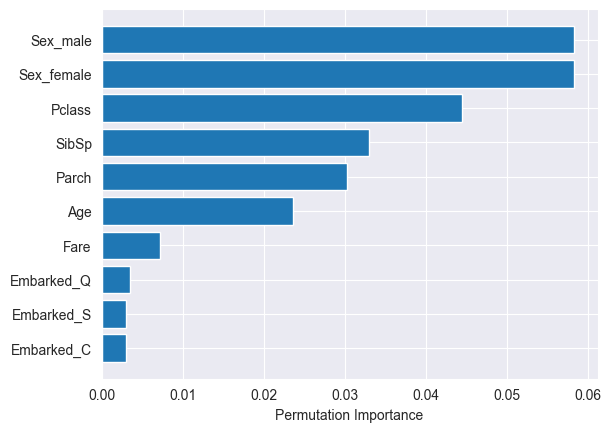

In [58]:
r.importances_mean

# plot the permutation importance
sorted_idx = r.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], r.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show();

In [ ]:

# Drop the  low scoring  feature Embarked_S	Embarked_C	Embarked_Q	
train = traindf.copy()
test = testdf.copy()


train = train.drop(['Embarked_Q'], axis=1)
test = test.drop(['Embarked_Q'], axis=1)

# train.head()
# test.head()

In [59]:
# compare the performance of the classifiers on the reduced dataset
cls_comparisons_Reduced = evaluate_classifiers(train)

cls_comparisons_Reduced

cls_comparisons


,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,SVC
Accuracy,0.810056,0.770950,0.810056,0.793296,0.821229
Precision,0.785714,0.714286,0.794118,0.753425,0.838710
Recall,0.743243,0.743243,0.729730,0.743243,0.702703
F1-Score,0.763889,0.728477,0.760563,0.748299,0.764706


,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,SVC
Accuracy,0.810056,0.770950,0.798883,0.804469,0.821229
Precision,0.785714,0.708861,0.763889,0.760000,0.838710
Recall,0.743243,0.756757,0.743243,0.770270,0.702703
F1-Score,0.763889,0.732026,0.753425,0.765101,0.764706


In [ ]:
#hyperparameter tuning using RandomizedSearchCV for XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
X = train.drop("Survived", axis=1)
y = train["Survived"]

# Split the data into features (X) and target variable (y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the classifier
classifier = XGBClassifier()

# Define the hyperparameter configuration space
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.3]
subsample = [0.5, 0.7, 0.9, 1.0]
colsample_bytree = [0.5, 0.7, 0.9, 1.0]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree
}

# Define the RandomizedSearchCV object
random_cv = RandomizedSearchCV(estimator=classifier,
                                param_distributions=hyperparameter_grid,
                                cv=5, n_iter=50,
                                scoring = 'accuracy',n_jobs = -1,
                                verbose = 1,
                                return_train_score = True,
                                random_state=42)

# Fit on the training data and get the best model
random_cv.fit(X_train, y_train)

# Get the best estimator
best_estimator = random_cv.best_estimator_

# Make predictions using the best model
y_pred = best_estimator.predict(X_val)



In [ ]:

# Get the accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(f"Best Estimator: {best_estimator}")


In [ ]:
#  Svc classifier  hyperparameter tuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
X = train.drop("Survived", axis=1)
y = train["Survived"]

# Split the data into features (X) and target variable (y)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [ ]:
# Assuming clf is your fitted RandomizedSearchCV object
# And XGBClassifier() without any arguments gives the default parameters

best_params = random_cv.best_estimator_.get_params()
default_params = XGBClassifier().get_params()

# Find parameters in best_params that are not in default_params
xb_params = {key: best_params[key] for key in best_params if best_params[key] != default_params[key]}

print(xb_params)

In [ ]:
xgbc = XGBClassifier(**xb_params)
xgbc.fit(X_train, y_train)
y_val_pred = xgbc.predict(X_val)

In [ ]:
pd.Series(y_val_pred).value_counts()


In [ ]:
# Get the accuracy score
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy: {accuracy}")

In [ ]:
X = train.drop("Survived", axis=1)
y_train = train["Survived"]

X_test = test.copy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X)

X_test = scaler.transform(X_test)

# Define the classifier
classifier = XGBClassifier(**xb_params)

# Fit the classifier
classifier.fit(X_train, y_train)

# Make predictions using the best model
ytest_pred = classifier.predict(X_test)




In [ ]:
# ytest_pred value  counts
pd.Series(ytest_pred).value_counts().to_frame()


**Create a Test predictions submission file**


In [ ]:
# Create a submission file
# submission = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': ytest_pred})


In [ ]:
#export submission file to csv
# submission.to_csv('submission.csv', index=False)

In [ ]:
# Export model to a file
# import joblib
# joblib.dump(classifier, 'titanic_xgb_model.pkl')

In [ ]:
# Create  fastapi app for the model

# import joblib
# import pandas as pd
# from fastapi import FastAPI
# from pydantic import BaseModel

# # Load the model
# model = joblib.load('titanic_xgb_model.pkl')

# # Create app
# app = FastAPI()

# # Define a root route
    

#### hidden section

In [ ]:
# pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier


# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import pandas as pd

# # Split the data into features (X) and target variable (y)
# X = traindf.drop("Survived", axis=1)
# y = traindf["Survived"]

# # Split the data into train and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the list of classifiers
# classifiers = [
#     LogisticRegression(),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(),
#     XGBClassifier(),
#     SVC()
# ]

# # Dictionary to store the performance metrics
# performance = {}

# # Iterate over the classifiers
# for classifier in classifiers:
#     # Train the classifier
#     classifier.fit(X_train, y_train)

#     # Make predictions on the validation set
#     y_pred = classifier.predict(X_val)

#     # Evaluate performance
#     accuracy = accuracy_score(y_val, y_pred)
#     precision = precision_score(y_val, y_pred)
#     recall = recall_score(y_val, y_pred)
#     f1 = f1_score(y_val, y_pred)

#     # Store the performance metrics
#     performance[classifier.__class__.__name__] = {
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1-Score': f1
#     }

# # Print the performance metrics
# for classifier, metrics in performance.items():
#     md(f"### {classifier}:")
#     for metric, value in metrics.items():
#         md(f"#### {metric}: {value.round(2)}")
#     print()
